<a href="https://colab.research.google.com/github/cavendano01/Data-Sciences-Galileo/blob/main/Image-Recognition/Image_%26_Text_Mining_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from google.colab.patches import cv2_imshow

In [2]:
#Data Loading
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#Loading Images for Testing

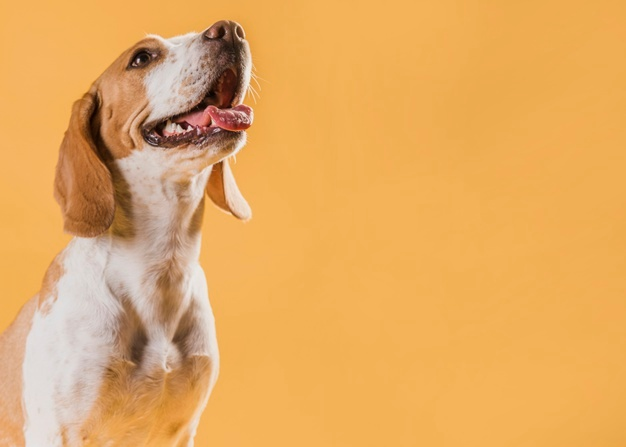

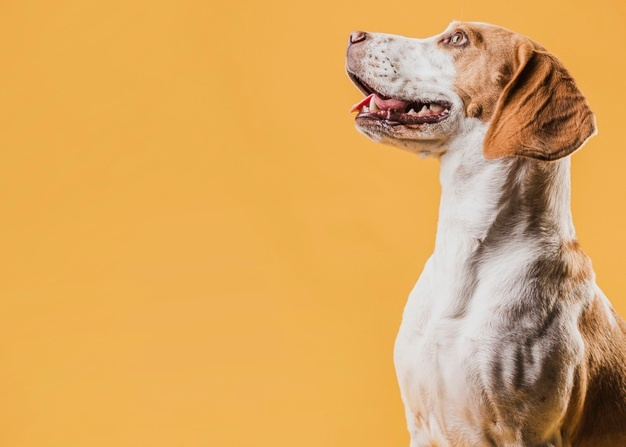

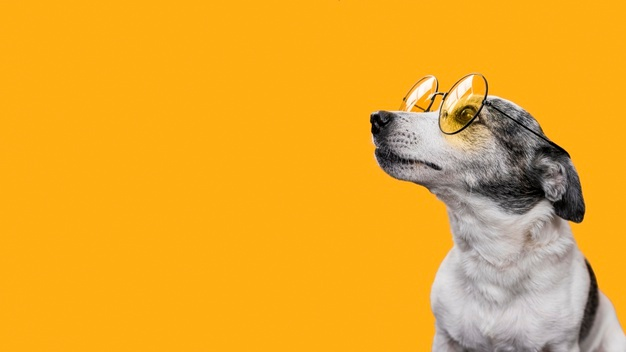

In [5]:
img3 = cv2.imread('/content/drive/MyDrive/Text-mining&Image-recognition/Lab2/sample1.jpg')
img1 = cv2.imread('/content/drive/MyDrive/Text-mining&Image-recognition/Lab2/sample2.jpg')
img2 = cv2.imread('/content/drive/MyDrive/Text-mining&Image-recognition/Lab2/sample3.jpg')
cv2_imshow(img1)
cv2_imshow(img2)
cv2_imshow(img3)

#Problema 1:
Desarrolle una funci´on que permita hacer la binarizaci´on de una imagen, para realizarlo puede utilizar el enfoque que prefiera. Recuerde que al binarizar una imagen esta solo puede contener los valores 0 (negro) y 255 (blanco).

In [86]:
def binarize(img):
  thresh_val = 128
  im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  maxval = 255
  Binarized = (im_gray > thresh_val) * maxval
  cv2_imshow(Binarized)
  return Binarized

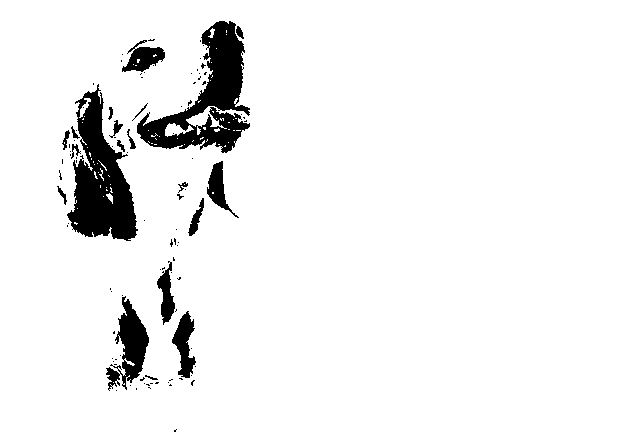

In [87]:
Binary = binarize(img1)

# Problema 2:
Desarrolle una funci´on que dada dos im´agenes a color, realice las operaciones SUMA, RESTA, AND, OR , XOR con ambas im´agenes recuerde que para realizar las operaciones l´ogicas es necesario que la imagen est´e binarizada. Para realizar las operaciones aritm´eticas se recomienda  seleccionar im´agenes que lo permitan y que sea f´acil revisar el resultado.

In [52]:
def Operations(op,im1,im2):
  if op == 1: # ADDITION
      result = im1 + im2
      result[result > 255] = 255
  elif op == 2: # SUBSTRACT
      result = im1 - im2
  elif op == 3: # AND
    result = np.bitwise_and(im1, im2).astype(np.uint8)
  elif op == 4: # OR
    result = np.bitwise_or(im1, im2).astype(np.uint8)
  elif op == 5: # XOR
    result = np.bitwise_xor(im1, im2).astype(np.uint8)
  cv2_imshow(result)
  return result

Image Addition


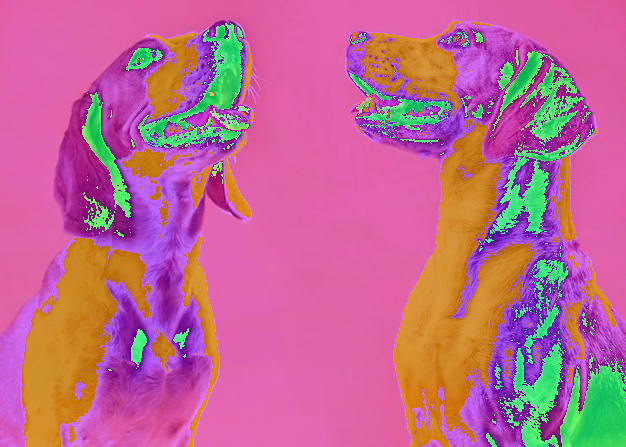

Image Substract


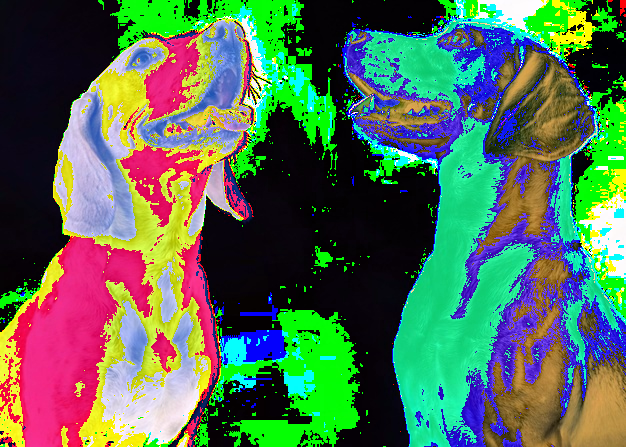

Image AND


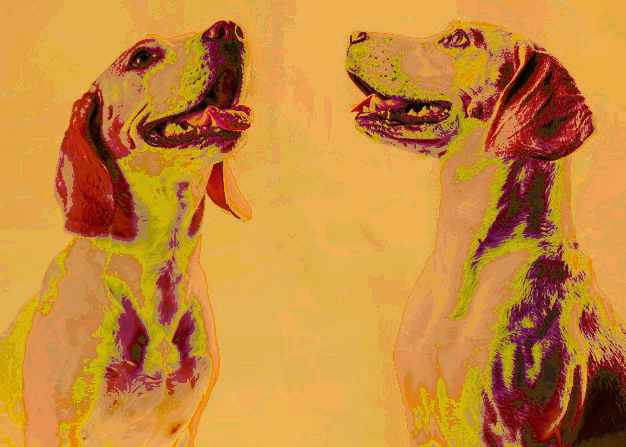

Image OR


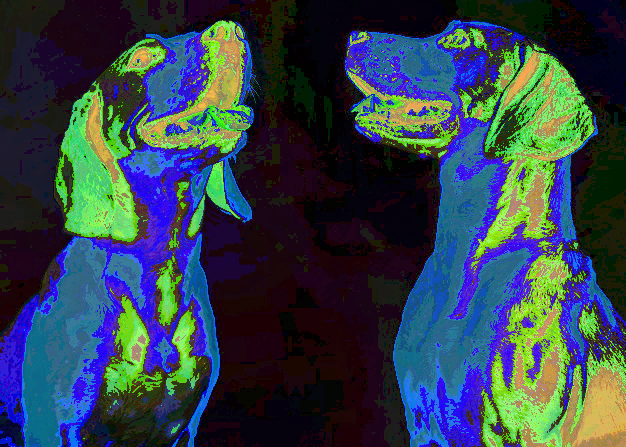

Image XOR


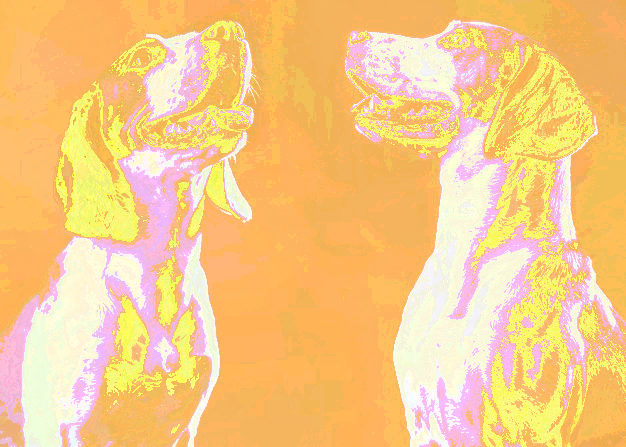

In [59]:
print("Image Addition")
img_ADD = Operations(1,img1,img2)
print("Image Substract")
img_SUB = Operations(2,img1,img2)
print("Image AND")
img_AND = Operations(3,img1,img2)
print("Image OR")
img_OR = Operations(4,img1,img2)
print("Image XOR")
img_OR = Operations(5,img1,img2)

# Problema 3
Desarrolle una funci´on que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la
intensidad del color gris de cada pixel


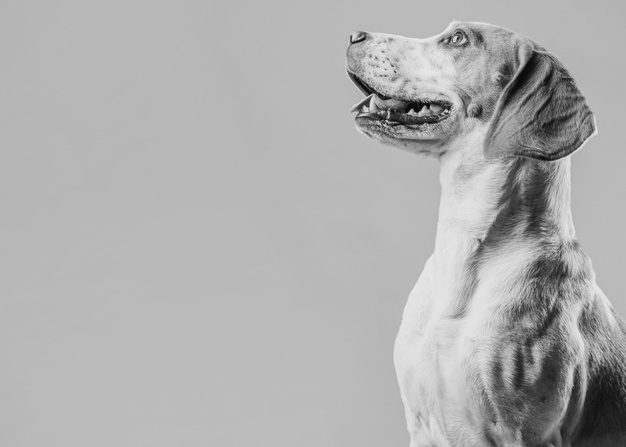

In [139]:
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

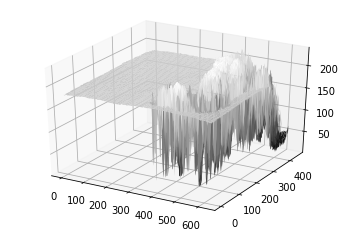

In [140]:
Y = np.arange(0, np.shape(gray)[0], 1)
X = np.arange(0, np.shape(gray)[1], 1)
X, Y = np.meshgrid(X, Y)
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, gray, cmap="gray") 
plt.show()

# Problema 4
Implemente una función para cada una de las trasformaciones vistas en clase: negativa, lineal, logarítmica y exponencial. Puede utilizar la misma función configurable por medio de parámetros, por ejemplo, si se ingresa 1 en el parámetro de selección se deberá realizar una transformacián lineal, si se ingresa 2 se deberá realizar una transformación logaritmica y así sucesivamente


In [133]:
def transformations(op, img):
  alto = img.shape[0]
  ancho = img.shape[1]
  result = np.zeros((alto, ancho, 1))  
  if op == 1:  #negativa
    result = 255 - img
  elif op == 2: #lineal
    result = 255+ img
  elif op == 3: #log
    c = 255/(np.log(1 + np.max(img)))
    result = c * np.log(1 + img)
  cv2_imshow(result)



negativa


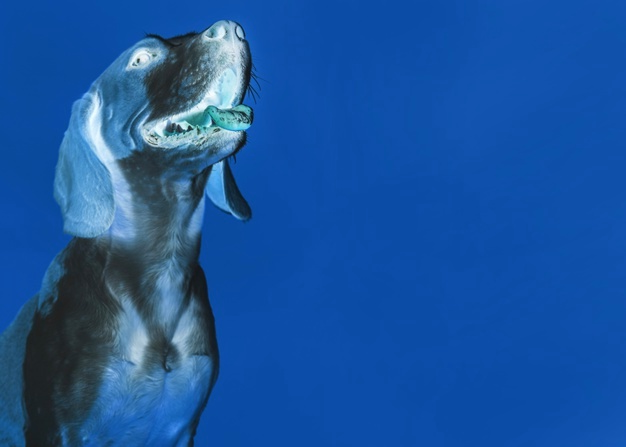

Lineal


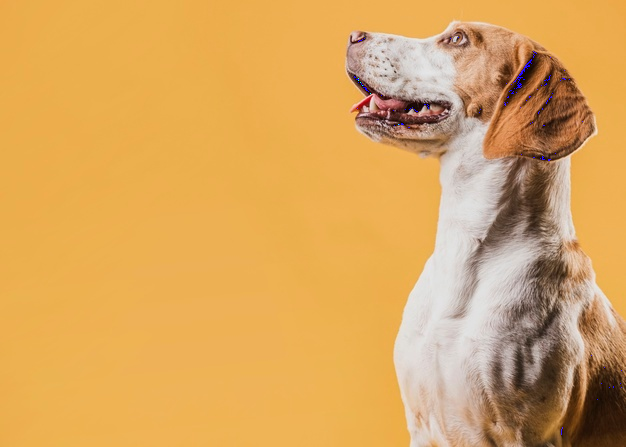

Logaritmica


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


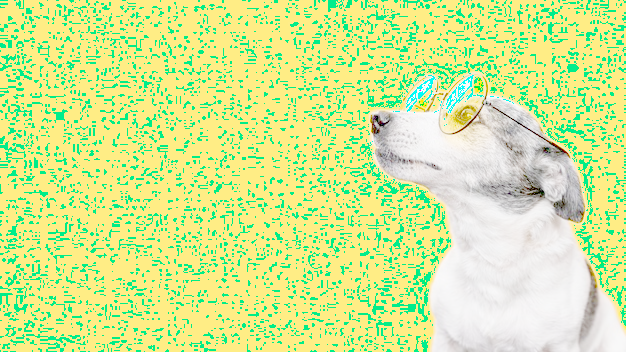

In [135]:
print("negativa")
tests = transformations(1, img1)
print("Lineal")
tests = transformations(2, img2)
print("Logaritmica")
tests = transformations(3, img3)

# Problema 5
Desarrolle una función que dada una imagen a color y kernel de cualquier dimensión (3X3, 5X5, 7X7, 9X9) y de cualquier tipo (Gaussiano, Sobel, Sharp, unsharp, laplaciano), aplique un filtro de convolución a dicha  imagen y muestre la imagen original y la imagen filtrada. Le recomendamos
implementar el kernel como un arreglo de numpy.
